In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df_train = pd.read_csv('https://storage.googleapis.com/an-datasets/train.csv')
df_eval = pd.read_csv('https://storage.googleapis.com/an-datasets/eval.csv')

In [ ]:
#Create the function to fit and transform the label encoder
def label_encode_columns(df, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

#Create the function to take in the fitted encoders and transform the scoring dataset
def label_encode_columns_w_fit_encoders(df, columns, encoders):
    for col in columns:
        le = encoders.get(col)
        df[col] = le.transform(df[col])
    return df
 
#Define the columns we want to encode
encode_columns = ['sex','class','deck','embark_town','alone']
 
#Fit and transform the training dataset, returing both the new training dataset and the fitted encoders to use on the scoring dataset
df_train, encoders = label_encode_columns(df=df_train, columns=encode_columns)
 
#Transform the scoring dataset using the encoders we fit previously
df_eval = label_encode_columns_w_fit_encoders(df=df_eval, columns=encode_columns, encoders=encoders)

In [ ]:
train_data = df_train.values
Y = train_data[:,0].reshape(train_data.shape[0],1)
X = train_data[:,1:]

eval_data = df_eval.values
Y_Eval = eval_data[:,0].reshape(eval_data.shape[0],1)
X_Eval = eval_data[:,1:]

In [ ]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_Eval = np.vstack((np.ones((X_Eval.shape[0], )), X_Eval.T)).T

In [ ]:
def sigmoid(z):
  return (1/(1 + np.exp(-z)))

In [ ]:
def lrmodel(X,Y, learning_rate, iterations):
  #m is the number of rows in the training data set.
  m = Y.size
  theta = np.zeros((X.shape[1],1))
  cost_list = []

  for i in range(iterations):
    y_pred = sigmoid(np.dot(X,theta))

    cost = -(1/m) * np.sum( Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

    d_theta = (1/m)*np.dot((y_pred - Y).T,X)

    theta = theta - learning_rate*d_theta.T

    cost_list.append(cost)

    if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

  return theta, cost_list

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.46991923048907164
cost after  20000 iteration is :  0.4522002223248149
cost after  30000 iteration is :  0.44458032681788706
cost after  40000 iteration is :  0.4395609805582429
cost after  50000 iteration is :  0.43587448980172905
cost after  60000 iteration is :  0.43307978720651336
cost after  70000 iteration is :  0.43093162206359065
cost after  80000 iteration is :  0.42926626245456706
cost after  90000 iteration is :  0.4279669890299618


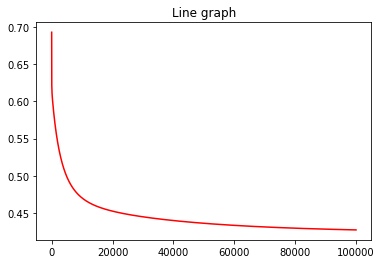

In [ ]:
iterations = 100000
learning_rate = 0.003
theta, cost_list = lrmodel(X, Y, learning_rate = learning_rate, iterations = iterations)


rng = np.arange(0, iterations)
plt.title("Line graph")
plt.plot(rng,cost_list,color="red")

In [ ]:
def accuracy(X, Y, theta):
    
    y_pred = sigmoid(np.dot(X, theta))
    
    y_pred = y_pred > 0.5
    
    y_pred = np.array(y_pred, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(y_pred - Y))/Y.shape[0])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

    return y_pred

In [ ]:
y_pred = accuracy(X_Eval, Y_Eval, theta)

Accuracy of the model is :  76.52 %
